In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
data=pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
print(f'Amount of rows and columns: {data.shape}')

Amount of rows and columns: (53940, 10)


In [90]:
#descriptive stats
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Are there issues with outliers in the data?

Firstly, we would like to check if there are abnormal data inputs in columns with nonnumerical data

In [91]:
print(data['cut'].value_counts())
print(data['color'].value_counts())
print(data['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


There is no abnormal data inputs for columns 'cut', 'color' and 'clarity'

To address outliers, data is visualized in box plots

In [92]:
def plot_boxplot(ft):
    fig = plt.figure(figsize =(7, 7))
    plt.boxplot(data[ft])
    plt.show()

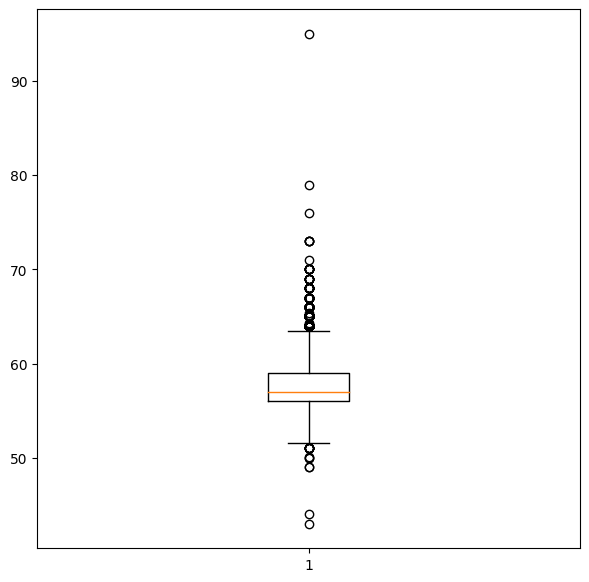

In [93]:
#Example box plot for 'table' attribute
plot_boxplot('table')

Next, outliers are removed

In [94]:
#This function returns a list of indexes of outliers, by calculation IQR
def outliers(ft):
    Q1=data[ft].quantile(0.25)
    Q3=data[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    ls = data.index[(data[ft]<lower_bound) | (data[ft]>upper_bound)]
    return ls

In [ ]:
# list of index with outliers for all attributes
index_list = []
for feature in ['carat','depth', 'table', 'price', 'x','y','z']:
    index_list.extend(outliers(feature))
print(f'Total amount of outliers: {len(set(index_list))}')

In [96]:
#function which removes outliers from our dataset:
def removed(ls):
    ls = sorted(set(ls))
    data_cleaned = data.drop(ls)
    return data_cleaned

In [97]:
data = removed(index_list)

In [98]:
print(f'size of dataframe without outliers: {data.shape}')

size of dataframe without outliers: (47524, 10)


## Do the attributes appear to be normal distributed?

In [149]:
#plotting distribution
def plot_histogram(ft):
    fig = plt.figure(figsize =(7, 7))
    plt.hist(data[ft],bins=12)
    plt.show()

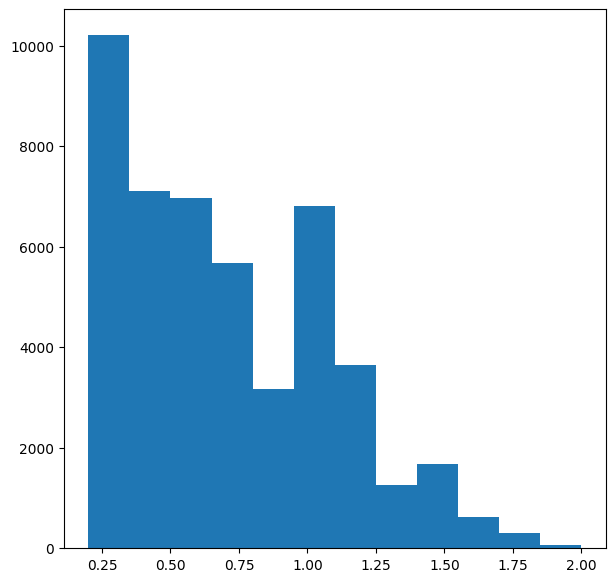

In [153]:
#example histogram of a 'carat' attribute
plot_histogram('carat')

'carat' attribute is not normally distributed

Another method to test normality is using formal statistical tests. For example, Shapiro-Wilk test. If p-value of the test is greater than 0.05, data could be assumed to be normally distributed.

In [113]:
from scipy.stats import shapiro 

In [131]:
print("carat:", (shapiro(data['carat'])))
print("depth:", (shapiro(data['depth'])))
print("table:", (shapiro(data['table'])))
print("price:", (shapiro(data['price'])))
print("x:", (shapiro(data['x'])))
print("y:", (shapiro(data['y'])))
print("z:", (shapiro(data['z'])))

carat: ShapiroResult(statistic=0.9133425354957581, pvalue=0.0)
depth: ShapiroResult(statistic=0.9914793372154236, pvalue=2.6624670822171524e-44)
table: ShapiroResult(statistic=0.9675689339637756, pvalue=0.0)
price: ShapiroResult(statistic=0.8466212749481201, pvalue=0.0)
x: ShapiroResult(statistic=0.9469312429428101, pvalue=0.0)
y: ShapiroResult(statistic=0.9463837742805481, pvalue=0.0)
z: ShapiroResult(statistic=0.9455302953720093, pvalue=0.0)


p-velues for all of the attributes are not greater than 0.05, therefore data is not normally distributed

'table' data is seems to be closest to 'normally distributed'

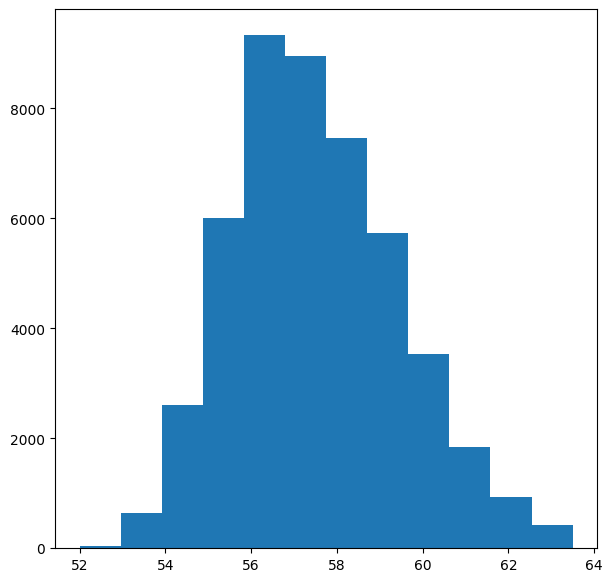

In [155]:
plot_histogram('table')

## Are veriables correlated?

In [160]:
cormat = data.corr()
round(cormat,2)

C:\Users\alyon\AppData\Local\Temp\ipykernel_12188\2569932629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = data.corr()


,carat,depth,table,price,x,y,z
carat,1.00,0.04,0.19,0.92,0.99,0.99,0.99
depth,0.04,1.00,-0.24,0.01,-0.01,-0.01,0.09
table,0.19,-0.24,1.00,0.14,0.19,0.18,0.16
price,0.92,0.01,0.14,1.00,0.90,0.90,0.90
x,0.99,-0.01,0.19,0.90,1.00,1.00,0.99
y,0.99,-0.01,0.18,0.90,1.00,1.00,0.99
z,0.99,0.09,0.16,0.90,0.99,0.99,1.00


As it can be seen, the strongest positive correlation are between carat, price and size(x,y,x). Table and depth seems to influence price. 